In [1]:
import os
import pandas as pd
import numpy as np
import missingno as msno
from datetime import datetime as dt 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import TransformerMixin, BaseEstimator

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_validate

from sklearn import set_config

set_config(display="diagram")
pd.options.display.float_format = '{:.3f}'.format

### Merging datasets and creating train/test split

In [2]:
transforme_2021 = pd.read_parquet("./transformed_data/transformed_2021-12.parquet")
transforme_2020 = pd.read_parquet("./transformed_data/transformed_2020-12.parquet")
transforme_2019 = pd.read_parquet("./transformed_data/transformed_2019-12.parquet")
transforme_2018 = pd.read_parquet("./transformed_data/transformed_2018-12.parquet")
transforme_2017 = pd.read_parquet("./transformed_data/transformed_2017-12.parquet")

In [3]:
df = pd.concat([transforme_2018,transforme_2017,transforme_2019,transforme_2020,transforme_2021])

In [4]:
transforme_2017.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'tolls_amount', 'trip_duration_minutes', 'is_weekend', 'weekday',
       'is_business_hours', 'time_of_day', 'year'],
      dtype='object')

In [5]:
target = df.pop('trip_duration_minutes')
target

4003682   16.883
4003683   25.383
6007597    4.600
6007598    5.133
6007599   10.467
           ...  
2752231   29.833
2752254   11.333
2752280    4.683
2752326   28.033
2752338    4.533
Name: trip_duration_minutes, Length: 1622197, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.33, shuffle=True, random_state=11,stratify=df['year'])

### EDA to understand year-to-year data

In [7]:
df = pd.concat([X_train,y_train],axis=1)

<Axes: >

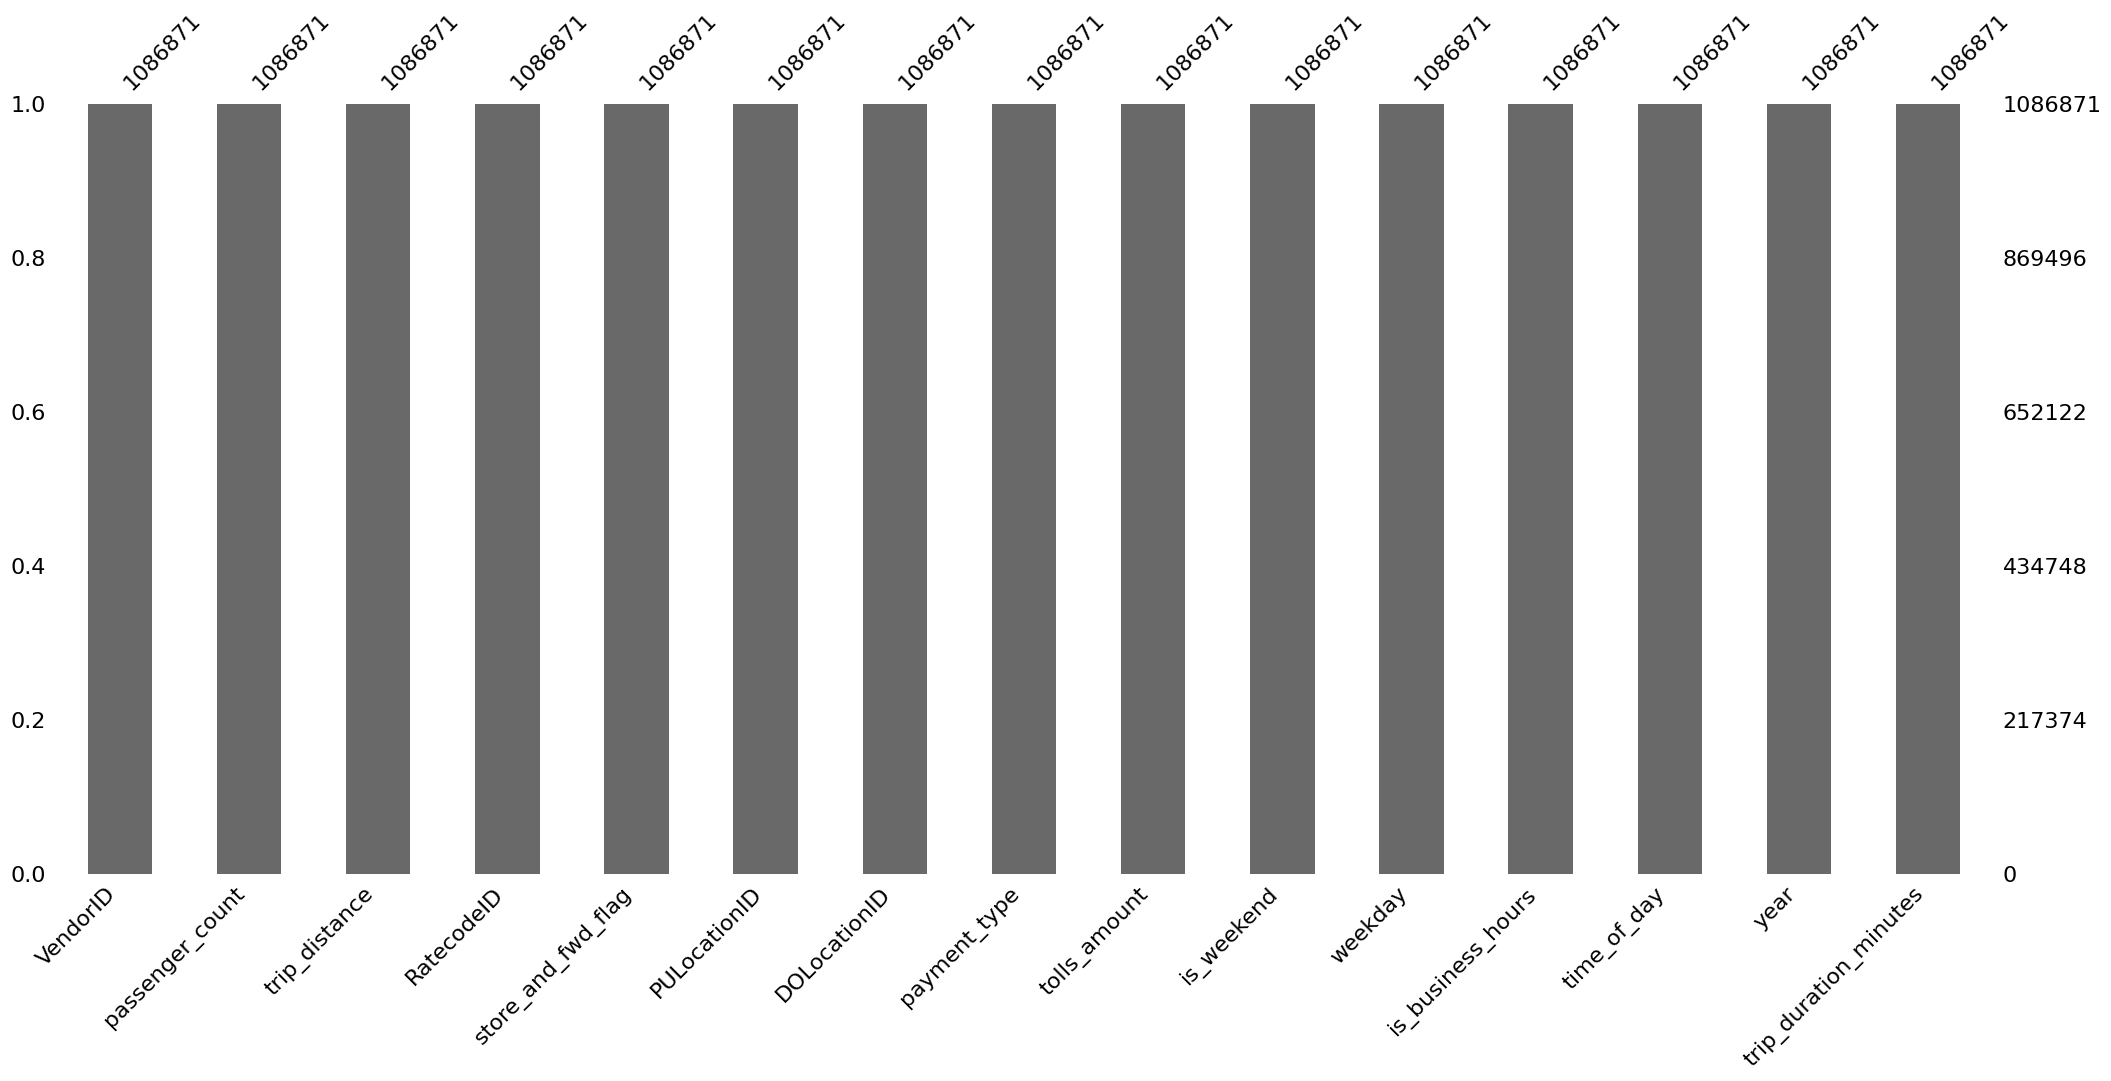

In [8]:
msno.bar(df)

In [9]:
df.tolls_amount.value_counts()

0.000    1043176
1.000      43695
Name: tolls_amount, dtype: int64

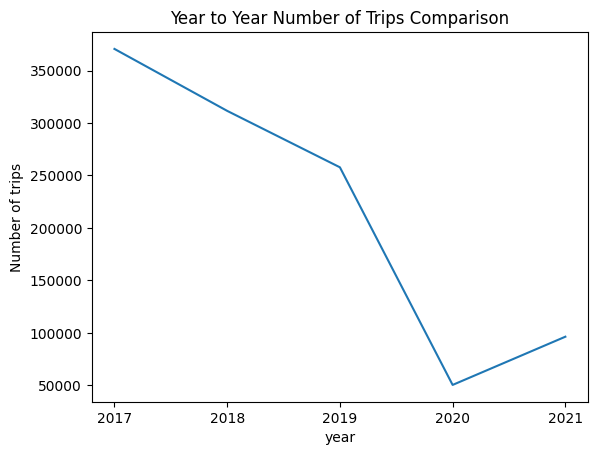

In [10]:
record_no_change_in_years = df.groupby('year').count()['VendorID'].reset_index(name='Number of trips')

g = sns.lineplot(data=record_no_change_in_years, x='year',y='Number of trips')
plt.title('Year to Year Number of Trips Comparison')
g.set_xticks(record_no_change_in_years['year'])
g.set_xticklabels(record_no_change_in_years['year'])
plt.show()

C:\Users\G026361\AppData\Local\Temp\ipykernel_6324\2671034235.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_trip_duration = df.groupby('year').mean()['trip_duration_minutes'].reset_index(name='Average Trip Duration')


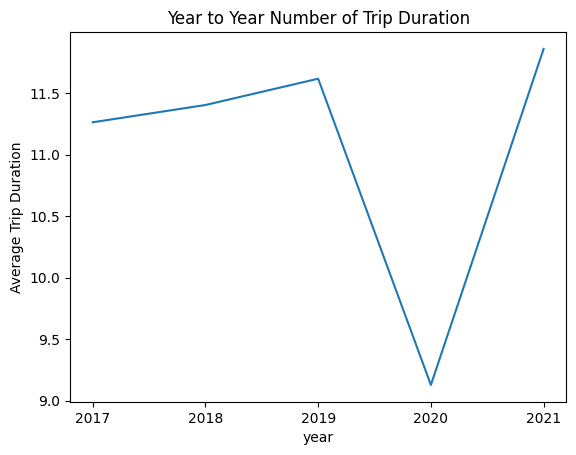

In [11]:
average_trip_duration = df.groupby('year').mean()['trip_duration_minutes'].reset_index(name='Average Trip Duration')

g = sns.lineplot(data=average_trip_duration, x='year',y='Average Trip Duration')
plt.title('Year to Year Number of Trip Duration')

g.set_xticks(record_no_change_in_years['year'])
g.set_xticklabels(record_no_change_in_years['year'])
plt.show()

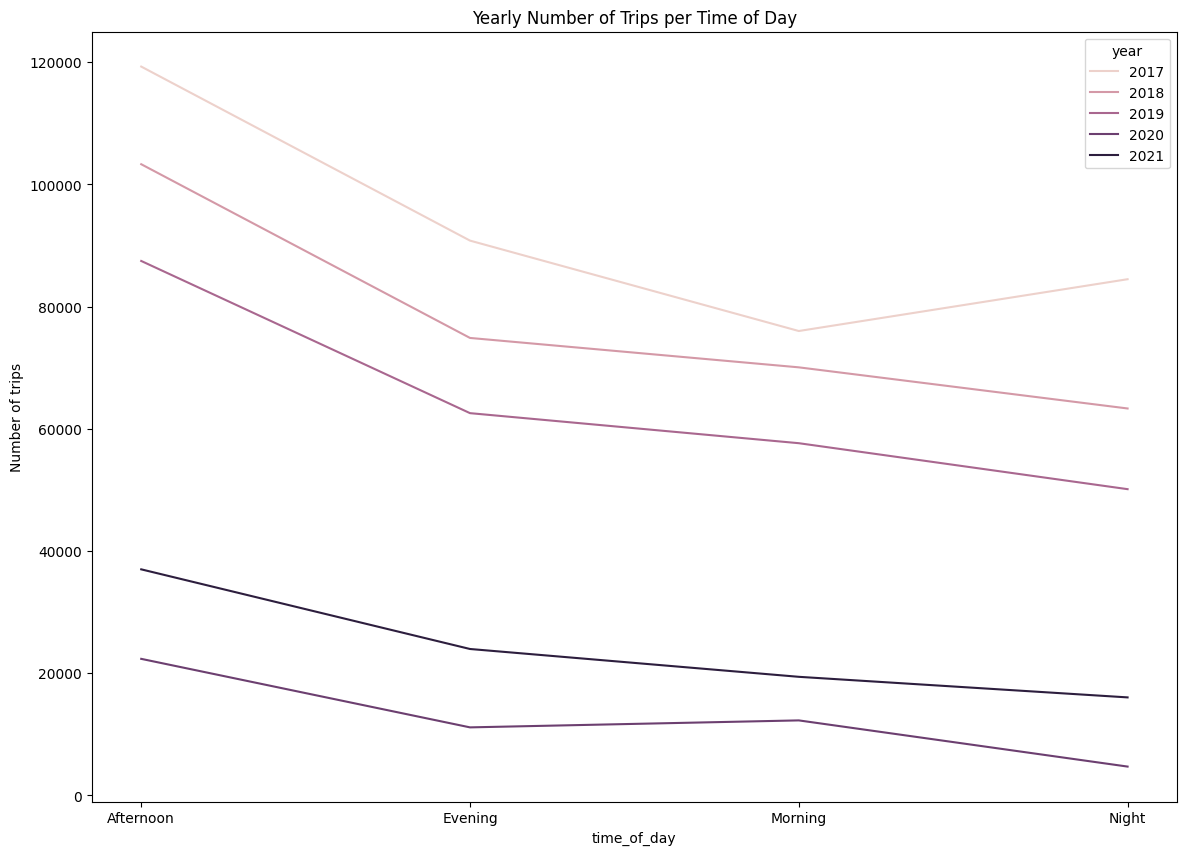

In [12]:
number_of_trips_time_of_day = df.groupby(['year','time_of_day']).count()['VendorID'].reset_index(name='Number of trips')
plt.figure(figsize = (14,10))
g = sns.lineplot(data=number_of_trips_time_of_day, x='time_of_day',y='Number of trips',hue='year')
plt.title('Yearly Number of Trips per Time of Day')


plt.show()

C:\Users\G026361\AppData\Local\Temp\ipykernel_6324\2763603882.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_trip_distance = df.groupby('year').mean()['trip_distance'].reset_index(name='Average Trip Distance')


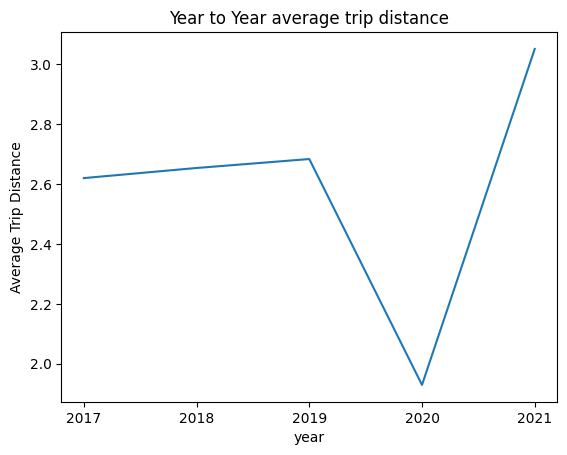

In [13]:
average_trip_distance = df.groupby('year').mean()['trip_distance'].reset_index(name='Average Trip Distance')

g = sns.lineplot(data=average_trip_distance, x='year',y='Average Trip Distance')
plt.title('Year to Year average trip distance')

g.set_xticks(record_no_change_in_years['year'])
g.set_xticklabels(record_no_change_in_years['year'])
plt.show()

C:\Users\G026361\AppData\Local\Temp\ipykernel_6324\402610104.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_trip_distance_per_time_of_day = df.groupby(['year','time_of_day']).mean()['trip_distance'].reset_index(name='Average Trip Distance')


Text(0.5, 1.0, 'Yearly Trip Distance Per time of Day')

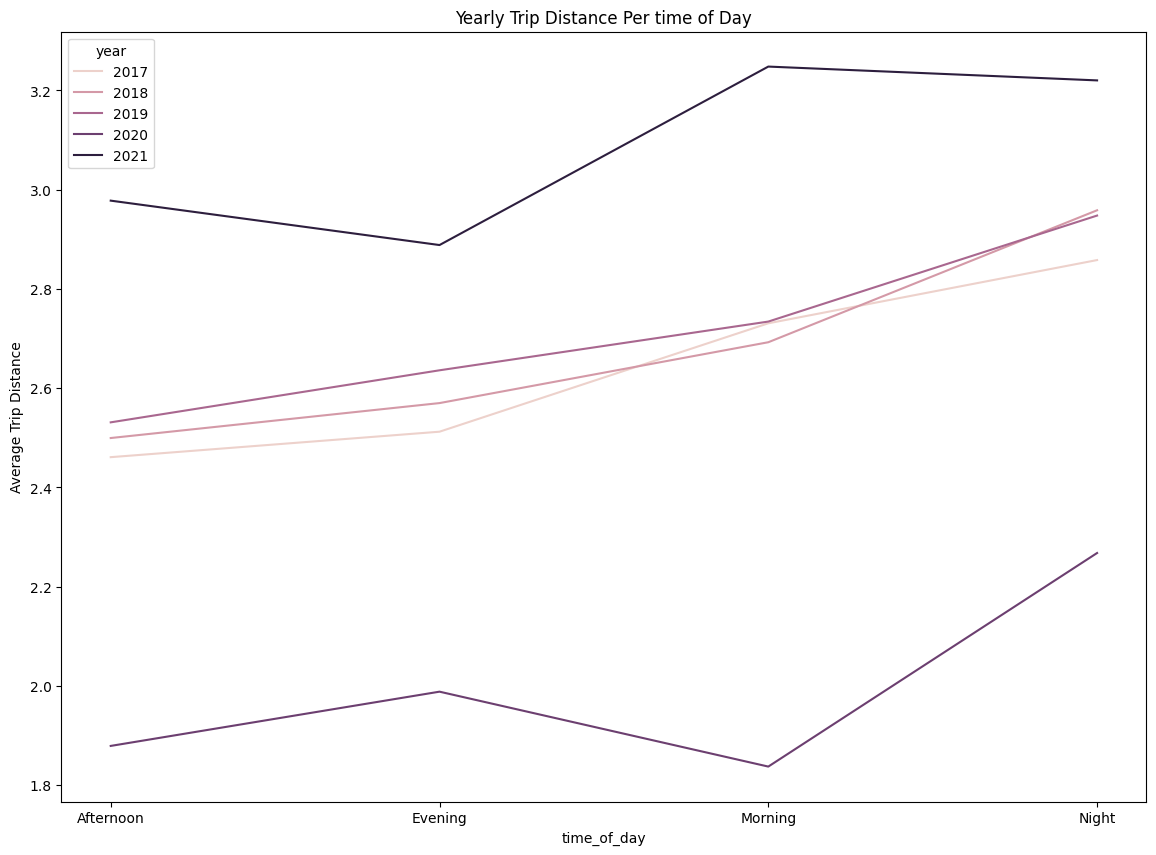

In [14]:
average_trip_distance_per_time_of_day = df.groupby(['year','time_of_day']).mean()['trip_distance'].reset_index(name='Average Trip Distance')
plt.figure(figsize = (14,10))
g = sns.lineplot(data=average_trip_distance_per_time_of_day, x='time_of_day',y='Average Trip Distance',hue='year')
plt.title('Yearly Trip Distance Per time of Day')


C:\Users\G026361\AppData\Local\Temp\ipykernel_6324\4012813851.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_number_of_passengers = df.groupby('year').mean()['passenger_count'].reset_index(name='Average of Passenger Count')


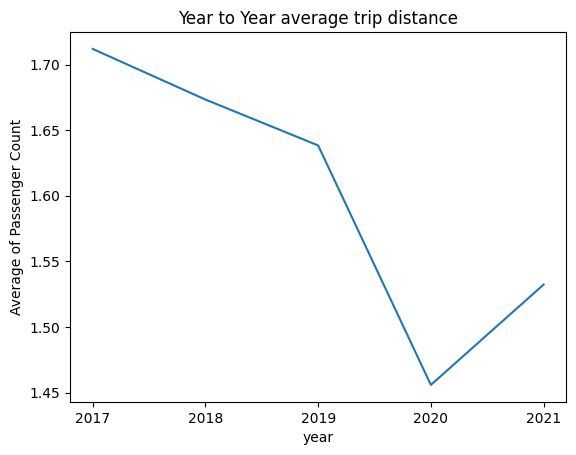

In [15]:
average_number_of_passengers = df.groupby('year').mean()['passenger_count'].reset_index(name='Average of Passenger Count')

g = sns.lineplot(data=average_number_of_passengers, x='year',y='Average of Passenger Count')
plt.title('Year to Year average trip distance')

g.set_xticks(record_no_change_in_years['year'])
g.set_xticklabels(record_no_change_in_years['year'])
plt.show()

In [16]:
vendor_id_by_year = df.groupby(['year','VendorID']).count()['trip_distance'].reset_index(name='Number of Records')
vendor_id_by_year

,year,VendorID,Number of Records
0,2017,1,156153
1,2017,2,214426
2,2018,1,115076
3,2018,2,196494
4,2019,1,78934
5,2019,2,178873
6,2020,1,15292
7,2020,2,35199
8,2021,1,27962
9,2021,2,68462


In [17]:
vendor_id_by_year_improved = vendor_id_by_year.merge(record_no_change_in_years, how='left',on='year')

vendor_id_by_year_improved['Number of Records %'] = round(vendor_id_by_year_improved['Number of Records'] / vendor_id_by_year_improved['Number of trips'] * 100,2)

In [18]:
vendor_id_by_year_improved

,year,VendorID,Number of Records,Number of trips,Number of Records %
0,2017,1,156153,370579,42.140
1,2017,2,214426,370579,57.860
2,2018,1,115076,311570,36.930
3,2018,2,196494,311570,63.070
4,2019,1,78934,257807,30.620
5,2019,2,178873,257807,69.380
6,2020,1,15292,50491,30.290
7,2020,2,35199,50491,69.710
8,2021,1,27962,96424,29.000
9,2021,2,68462,96424,71.000


In [19]:
vendor_id_by_year_improved['VendorID'] = vendor_id_by_year_improved['VendorID'].map({1:'Creative Mobile Technologies, LLC',2:'VeriFone Inc.'})

In [20]:
# g = sns.lineplot(data=vendor_id_by_year_improved, x='year',y='Number of Records %',hue='VendorID')
# plt.title('Percentage Year to Year Change of Vendor ID')

# g.set_xticks(vendor_id_by_year_improved['year'])
# g.set_xticklabels(vendor_id_by_year_improved['year'])
# plt.show()

In [21]:
check = df.PULocationID.value_counts().reset_index(name='count')

In [22]:
a = list(check[check['count']<10]['index'])

In [23]:
len(a)

2

In [24]:
len(df)
#1107255

1086871

### Feature encoding

In [25]:
class DummyTransformer(BaseEstimator, TransformerMixin):
    """
    Dummy class that allows us to modify only the methods that interest us,
    avoiding redudancy.
    """
    def __init__(self):
        return None

    def fit(self, X=None, y=None):
        return self

    def transform(self, X=None):
        return self
    

In [26]:
class remove_non_required_columns(DummyTransformer):
    """ Transformer class that removes non required columns used during year-to-year comparison. """

    def __init__(self, columns_to_remove:list=['year']):
        """Initializes an instance of our custom transformer."""
        self.columns_to_remove =columns_to_remove

    def transform(self, X, y=None):
        """transform to datetime """
        try:
            X = X.drop(self.columns_to_remove,axis=1)
            return X
        except:
            print('Problem dropping year column')

In [27]:
# class remove_pickup_location_outliers(DummyTransformer):
#     """ Transformer class that removes ouliers from pickup location. """

#     def __init__(self):
#         """Initializes an instance of our custom transformer."""
#         return None

#     def transform(self, X, y=None):
#         """transform to datetime """
#         try:
#             temp_ = X['PULocationID'].value_counts().reset_index(name='count')
#             for value in temp_:
#                 X = X[X['PULocationID']!= value]
#             return X
#         except:
#             print('Problem dropping year column')

In [28]:
year_column_name = 'year'

# column_remover = Pipeline(
#     steps=[
#         ('remove year column', remove_non_required_columns(columns_to_remove=year_column_name)),
#         # ('Remove Pickup Location Outliers', remove_pickup_location_outliers())
#         ]
# )

In [29]:
numeric_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
        ])

In [30]:
categorical_transformer = Pipeline(
    steps=[
        ('encoder', OneHotEncoder(drop='if_binary'))
        ])

In [31]:
categorical_columns = ['VendorID', 'passenger_count','RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'tolls_amount', 'is_weekend', 'weekday', 'is_business_hours',
       'time_of_day']
numeric_columns = ['trip_distance']

In [32]:
column_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
        ],
        remainder='drop'
        )

In [33]:
column_preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['trip_distance']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='if_binary'))]),
                                 ['VendorID', 'passenger_count', 'RatecodeID',
                                  'store_and_fwd_flag', 'PULocationID',
                                  'DOLocationID', 'payment_type',
                                  'tolls_amount', 'is_weekend', 'weekday',
                                  'is_business_hours', 'time_of_day'])])

In [34]:
year_column_name = 'year'

preprocessor = Pipeline(
    steps=[('remove year column', remove_non_required_columns(columns_to_remove=year_column_name)),
           ('Column Preprocessor',column_preprocessor)]
)
preprocessor

Pipeline(steps=[('remove year column',
                 remove_non_required_columns(columns_to_remove='year')),
                ('Column Preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['trip_distance']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  ['VendorID',
                                                   'passenger_count',
                                                   'RatecodeID',
                                                   'store_and_fwd_flag',
                                                   'PULocationID',
                                                   'DOLocationID',
                                                   'payment_type',
                                                   'tolls_amount', 'is_weekend',
                                                   'weekday',
                                                   'is_business_hours',
                                                   'time_of_day'])]))])

### Linear regression

In [35]:
linear_regression = LinearRegression(n_jobs=-1)


In [36]:
linear_regression_pipeline = Pipeline(
    steps=[
        ('Feature Pre-processing', preprocessor),
        ('Linear Regression',linear_regression)
    ]
)

linear_regression_pipeline

Pipeline(steps=[('Feature Pre-processing',
                 Pipeline(steps=[('remove year column',
                                  remove_non_required_columns(columns_to_remove='year')),
                                 ('Column Preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('scaler',
                                                                                    StandardScaler())]),
                                                                   ['trip_distance']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('encoder',
                                                                                    OneHotEncoder(drop='if_binary'))]),
                                                                   ['VendorID',
                                                                    'passenger_count',
                                                                    'RatecodeID',
                                                                    'store_and_fwd_flag',
                                                                    'PULocationID',
                                                                    'DOLocationID',
                                                                    'payment_type',
                                                                    'tolls_amount',
                                                                    'is_weekend',
                                                                    'weekday',
                                                                    'is_business_hours',
                                                                    'time_of_day'])]))])),
                ('Linear Regression', LinearRegression(n_jobs=-1))])

In [37]:
scores_linear_regression = cross_validate(linear_regression_pipeline, X_train, y_train, cv=3,
                          scoring=('neg_mean_squared_error'),
                          return_train_score=True)

In [38]:
scores_linear_regression

{'fit_time': array([11.64834547,  9.91506982,  9.94603586]),
 'score_time': array([0.61336017, 0.62743664, 0.61631298]),
 'test_score': array([-18.1185828 , -18.06358791, -18.03764707]),
 'train_score': array([-18.02406006, -18.051433  , -18.06358808])}

In [39]:
round(np.average(np.sqrt(-scores_linear_regression['test_score'])),2)

4.25

### Lasso Regression

In [40]:
lasso_regression = Lasso(warm_start=True,random_state=111)

In [41]:
pipeline_lasso_regression = Pipeline(
    steps=[
        ('Feature Pre-processing', preprocessor),
        ('Lasso Regression',lasso_regression)
    ]
)

In [42]:
scores_lasso_regression = cross_validate(pipeline_lasso_regression, X_train, y_train, cv=3,
                          scoring=('r2','neg_mean_squared_error'),
                          return_train_score=True)

In [43]:
pipeline_lasso_regression.fit(X_train,y_train)

Pipeline(steps=[('Feature Pre-processing',
                 Pipeline(steps=[('remove year column',
                                  remove_non_required_columns(columns_to_remove='year')),
                                 ('Column Preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('scaler',
                                                                                    StandardScaler())]),
                                                                   ['trip_distance']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('encoder',
                                                                                    OneHotEncoder(drop='if_binary'))]),
                                                                   ['VendorID',
                                                                    'passenger_count',
                                                                    'RatecodeID',
                                                                    'store_and_fwd_flag',
                                                                    'PULocationID',
                                                                    'DOLocationID',
                                                                    'payment_type',
                                                                    'tolls_amount',
                                                                    'is_weekend',
                                                                    'weekday',
                                                                    'is_business_hours',
                                                                    'time_of_day'])]))])),
                ('Lasso Regression', Lasso(random_state=111, warm_start=True))])

In [44]:
score = pipeline_lasso_regression.score(X_train,y_train)

In [45]:
print(score,np.sqrt(score))

0.5946145417555266 0.7711125350787177


### Ridge Regression

In [46]:
ridge_regression = Ridge(random_state=123)

In [47]:
pipeline_ridge_regression = Pipeline(
    steps=[
        ('Feature Pre-processing', preprocessor),
        ('ridge Regression',ridge_regression)
    ]
)

In [48]:
pipeline_ridge_regression.fit(X_train,y_train)

Pipeline(steps=[('Feature Pre-processing',
                 Pipeline(steps=[('remove year column',
                                  remove_non_required_columns(columns_to_remove='year')),
                                 ('Column Preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('scaler',
                                                                                    StandardScaler())]),
                                                                   ['trip_distance']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('encoder',
                                                                                    OneHotEncoder(drop='if_binary'))]),
                                                                   ['VendorID',
                                                                    'passenger_count',
                                                                    'RatecodeID',
                                                                    'store_and_fwd_flag',
                                                                    'PULocationID',
                                                                    'DOLocationID',
                                                                    'payment_type',
                                                                    'tolls_amount',
                                                                    'is_weekend',
                                                                    'weekday',
                                                                    'is_business_hours',
                                                                    'time_of_day'])]))])),
                ('ridge Regression', Ridge(random_state=123))])

In [49]:
pipeline_ridge_regression.score(X_train,y_train)

0.723593679488357

### XGBoost regression

In [50]:
xgboost_regressor = XGBRegressor()

In [51]:
pipeline_xgboost_regressor = Pipeline(
    steps=[
        ('Feature Pre-processing', preprocessor),
        ('XGBoost Regression',xgboost_regressor)
    ]
)

In [52]:
pipeline_xgboost_regressor.fit(X_train,y_train)

Pipeline(steps=[('Feature Pre-processing',
                 Pipeline(steps=[('remove year column',
                                  remove_non_required_columns(columns_to_remove='year')),
                                 ('Column Preprocessor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('scaler',
                                                                                    StandardScaler())]),
                                                                   ['trip_distance']),
                                                                  ('cat',
                                                                   Pipeline(steps=[('encoder',
                                                                                    OneHotEncoder(drop='if_binary'))]),
                                                                   ['VendorID',
                                                                    'passenger_...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [53]:
r2 = pipeline_xgboost_regressor.score(X_train,y_train)

In [54]:
r2

0.810178234654258

### Decision Tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
decision_tree_regressor = DecisionTreeRegressor(random_state=0,)

In [58]:
pipeline_decision_tree_regressor = Pipeline(
    steps=[
        ('Feature Pre-processing', preprocessor),
        ('Decision Tree Regressor',decision_tree_regressor)
    ]
)

In [59]:
# pipeline_decision_tree_regressor.fit(X_train,y_train)
# takes 20+ minutes to run, closed it for the night. question: how to manage runtime, make it faster?

In [ ]:
r2 = pipeline_decision_tree_regressor.score(X_train,y_train)

In [ ]:
r2

0.810178234654258